# Klasterizacija automobila na trzistu - Nenadgledano učenje

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import EllipticEnvelope
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import plotly.graph_objs as go

### Dataset import

In [82]:
data_frame = pd.read_csv("cardekho_dataset.csv")

inicial_count = len(data_frame)
data_frame.dropna(inplace=True)
count_after_missig_values = len(data_frame)
print("Droped " + str(inicial_count-count_after_missig_values) + " rows with missing values")

# Deleting unvanted column for indexing
data_frame.drop("Unnamed: 0", axis=1, inplace=True) 
data_frame.drop_duplicates() # 167 duplicates of 14000 

Droped 0 rows with missing values


car_name     brand     model  vehicle_age  km_driven  \
0          Maruti Alto    Maruti      Alto            9     120000   
1        Hyundai Grand   Hyundai     Grand            5      20000   
2          Hyundai i20   Hyundai       i20           11      60000   
3          Maruti Alto    Maruti      Alto            9      37000   
4        Ford Ecosport      Ford  Ecosport            6      30000   
...                ...       ...       ...          ...        ...   
15406      Hyundai i10   Hyundai       i10            9      10723   
15407    Maruti Ertiga    Maruti    Ertiga            2      18000   
15408      Skoda Rapid     Skoda     Rapid            6      67000   
15409  Mahindra XUV500  Mahindra    XUV500            5    3800000   
15410       Honda City     Honda      City            2      13000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
0      Individual    Petrol            Manual    19.70     796      46.30   
1      Individual    Petrol            Manual    18.90    1197      82.00   
2      Individual    Petrol            Manual    17.00    1197      80.00   
3      Individual    Petrol            Manual    20.92     998      67.10   
4          Dealer    Diesel            Manual    22.77    1498      98.59   
...           ...       ...               ...      ...     ...        ...   
15406      Dealer    Petrol            Manual    19.81    1086      68.05   
15407      Dealer    Petrol            Manual    17.50    1373      91.10   
15408      Dealer    Diesel            Manual    21.14    1498     103.52   
15409      Dealer    Diesel            Manual    16.00    2179     140.00   
15410      Dealer    Petrol         Automatic    18.00    1497     117.60   

       seats  selling_price  
0          5         120000  
1          5         550000  
2          5         215000  
3          5         226000  
4          5         570000  
...      ...            ...  
15406      5         250000  
15407      7         925000  
15408      5         425000  
15409      7        1225000  
15410      5        1200000  

[15244 rows x 13 columns]

### Data Analysis

Data statistics

Outliers Droped: 0


c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarn

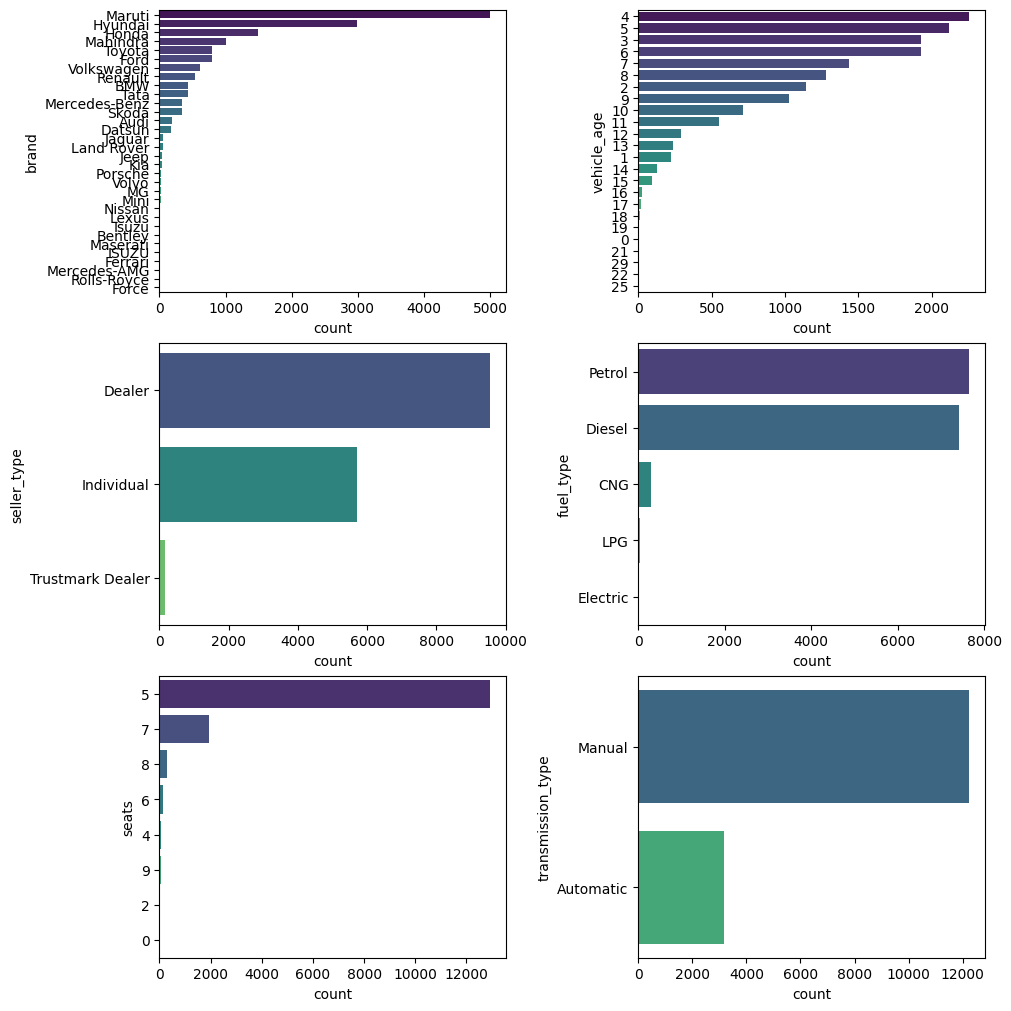

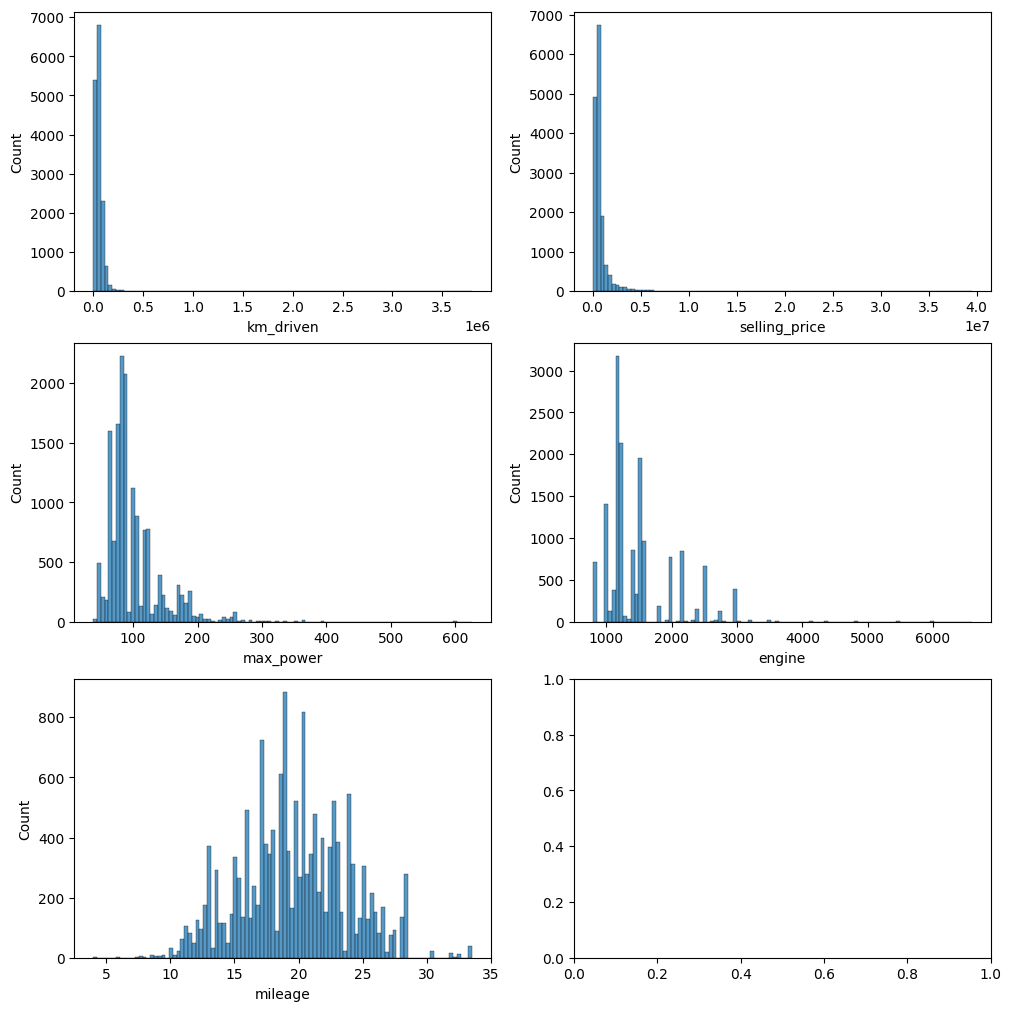

In [102]:
# Extract numerical features for clustering
numerical_features = ['vehicle_age', 'km_driven', 'selling_price', 'max_power', 'engine', 'mileage']

outlier_detector = EllipticEnvelope(contamination=.5)

# Fit detector
outlier_detector.fit(data_frame[numerical_features])
inicial_count = len(data_frame)
# Predict outliers
outliers = outlier_detector.predict(data_frame[numerical_features])
outliers_indices = outliers == -1
data_frame_shuffled = data_frame[~outliers_indices]
data_frame_shuffled_original = data_frame[~outliers_indices]

count_after_missig_values = len(data_frame)
print("Outliers Droped: " + str(inicial_count-count_after_missig_values))

fig, axs = plt.subplots(3, 2, figsize=(10,10), constrained_layout=True)
categorical = ['brand', 'vehicle_age', 'seller_type', 'fuel_type', 'seats', 'transmission_type']
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=data_frame, ax=axs[i//2][i%2], order=data_frame[f].value_counts().index, palette='viridis')

fig, axs = plt.subplots(3, 2, figsize=(10,10), constrained_layout=True)
numerical = ['km_driven', 'selling_price', 'max_power', 'engine', 'mileage']
for i, f in enumerate(numerical):
    sns.histplot(x=f, data=data_frame, ax=axs[i//2][i%2], bins=100)

### Data manipulation

                   vehicle_age  km_driven  seller_type  fuel_type  \
vehicle_age           1.000000   0.463738     0.022478   0.028699   
km_driven             0.463738   1.000000    -0.105197   0.312300   
seller_type           0.022478  -0.105197     1.000000   0.004599   
fuel_type             0.028699   0.312300     0.004599   1.000000   
transmission_type    -0.068054  -0.090774     0.186082  -0.018017   
mileage              -0.268071  -0.144042    -0.060084   0.173921   
engine                0.117858   0.281445     0.079837   0.397183   
max_power             0.031274   0.086241     0.160758   0.221700   
seats                -0.004214   0.170753    -0.056263   0.278737   
selling_price        -0.287893  -0.093257     0.142992   0.251534   

                   transmission_type   mileage    engine  max_power     seats  \
vehicle_age                -0.068054 -0.268071  0.117858   0.031274 -0.004214   
km_driven                  -0.090774 -0.144042  0.281445   0.086241  0.170753 

<Axes: >

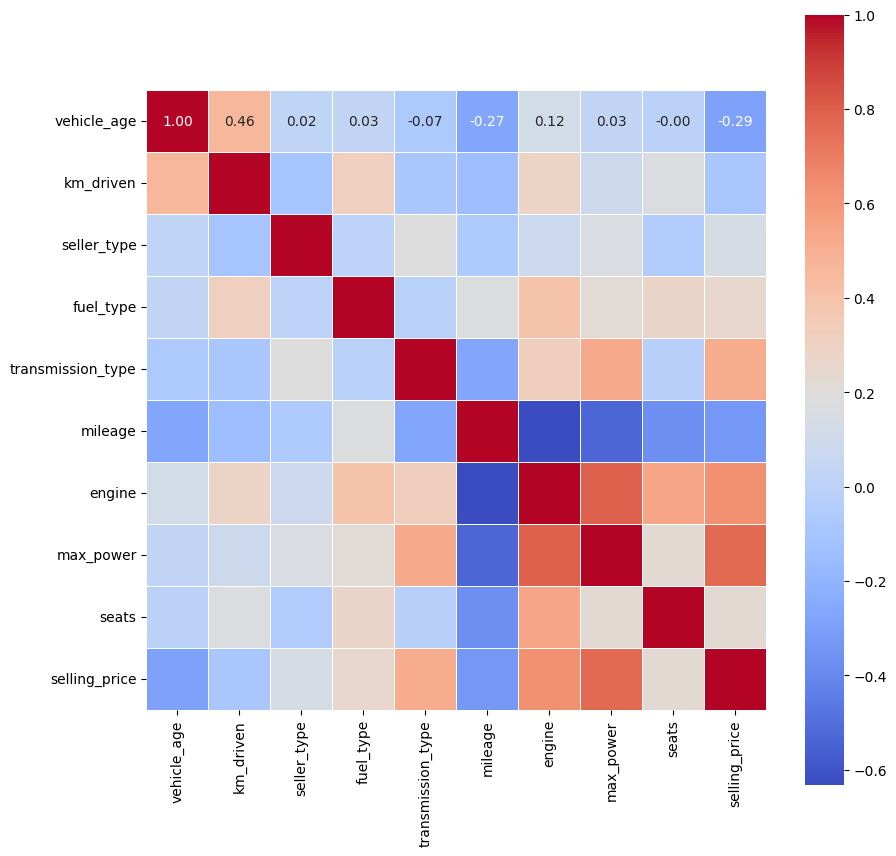

In [84]:
data_frame_shuffled = data_frame.sample(frac=1) # Shuffle
data_frame_shuffled.reset_index(drop=True, inplace=True)
data_frame_shuffled_original = pd.DataFrame(data_frame_shuffled)
data_frame_shuffled.drop("car_name", axis=1, inplace=True)
data_frame_shuffled.drop("brand", axis=1, inplace=True)
data_frame_shuffled.drop("model", axis=1, inplace=True)


# Enumerate the categorical features
# car_name_mapping = {car_name: idx for idx, car_name in enumerate(data_frame_shuffled['car_name'].unique())}
# data_frame_shuffled['car_name'] = data_frame_shuffled['car_name'].map(car_name_mapping)

fuel_type_mapping = {fuel_type: idx for idx, fuel_type in enumerate(data_frame['fuel_type'].unique())}
data_frame_shuffled['fuel_type'] = data_frame_shuffled['fuel_type'].map(fuel_type_mapping)

transmission_type_mapping = {trans_type: idx for idx, trans_type in enumerate(data_frame['transmission_type'].unique())}
data_frame_shuffled['transmission_type'] = data_frame_shuffled['transmission_type'].map(transmission_type_mapping)

transmission_type_mapping = {seller_type: idx for idx, seller_type in enumerate(data_frame['seller_type'].unique())}
data_frame_shuffled['seller_type'] = data_frame_shuffled['seller_type'].map(transmission_type_mapping)

transmission_type_mapping = {seats: idx for idx, seats in enumerate(data_frame['seats'].unique())}
data_frame_shuffled['seats'] = data_frame_shuffled['seats'].map(transmission_type_mapping)

# Display the enumerated data
data_frame_shuffled.head()

# Extract numerical features for clustering
numerical_features = ['vehicle_age', 'km_driven', 'selling_price', 'max_power', 'engine', 'mileage']

# outlier_detector = EllipticEnvelope(contamination=.01)

# # Fit detector
# outlier_detector.fit(data_frame_shuffled[numerical_features])

# # Predict outliers
# outliers = outlier_detector.predict(data_frame_shuffled[numerical_features])
# outliers_indices = outliers == -1
# data_frame_shuffled = data_frame_shuffled[~outliers_indices]
# data_frame_shuffled_original = data_frame_shuffled_original[~outliers_indices]

# Standardize the numerical features
scaler = MinMaxScaler(feature_range=(-1, 1))
data_frame_shuffled[numerical_features] = scaler.fit_transform(data_frame_shuffled[numerical_features])

data_frame_shuffled.tail()

corr_matrix = data_frame_shuffled.corr()
print(corr_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})



Otklanjanje parametra 'engine' ili 'max_power' nije od velike koristi i zato neće biti uklonjen (korelacija ova dva iznosi 79%).

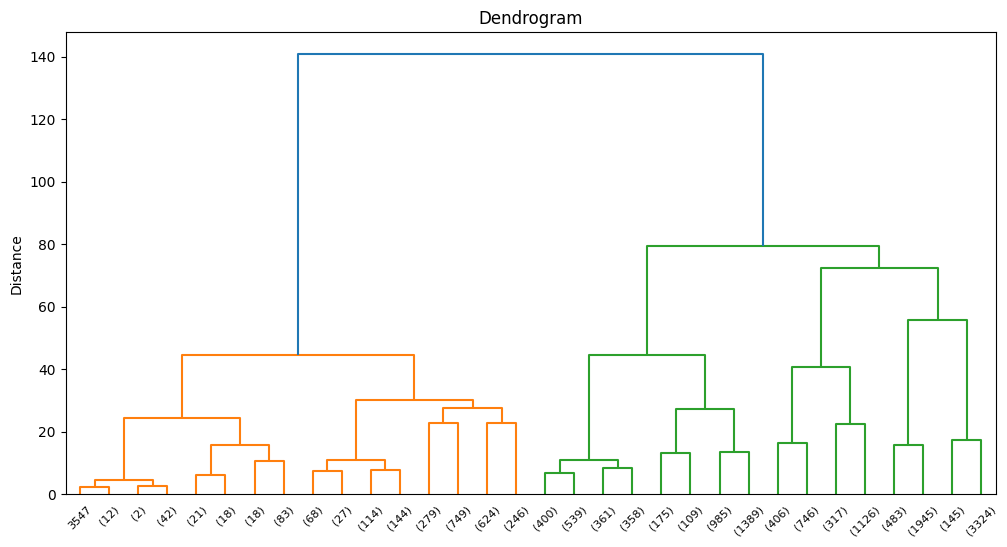

In [85]:
from scipy.cluster import hierarchy as sch


# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(data_frame_shuffled.values, method='ward'), truncate_mode='level', p=4)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()


### Elbow metoda za odredjianje broja klastera

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Nemanja\AppData\Roa

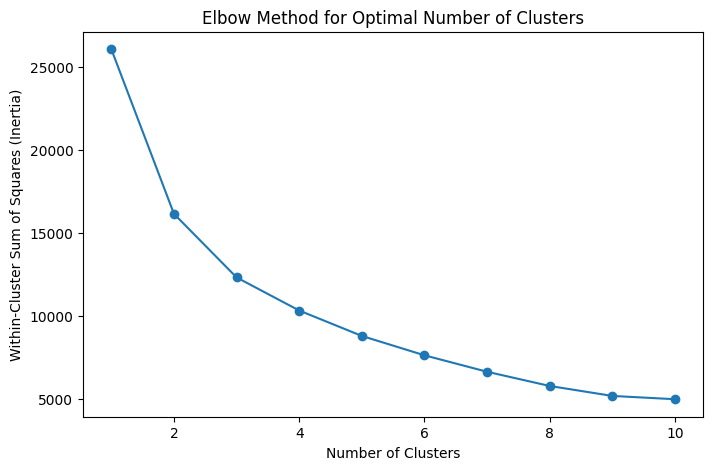

In [86]:
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_frame_shuffled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

### Klasterizacija k-means algoritmom, 3 klastera

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



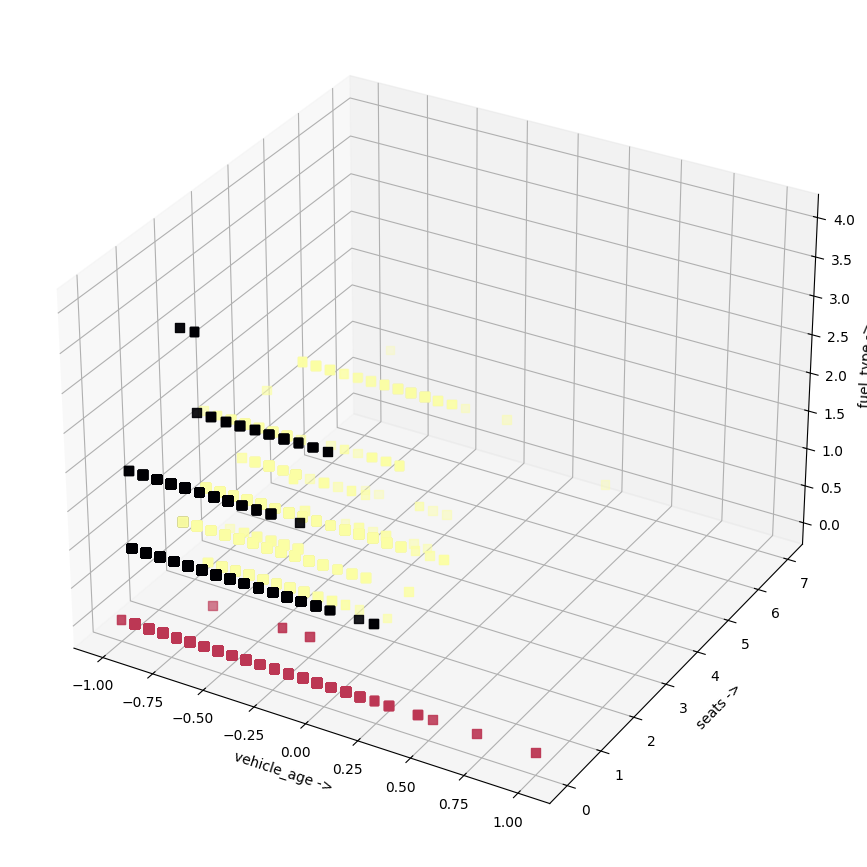

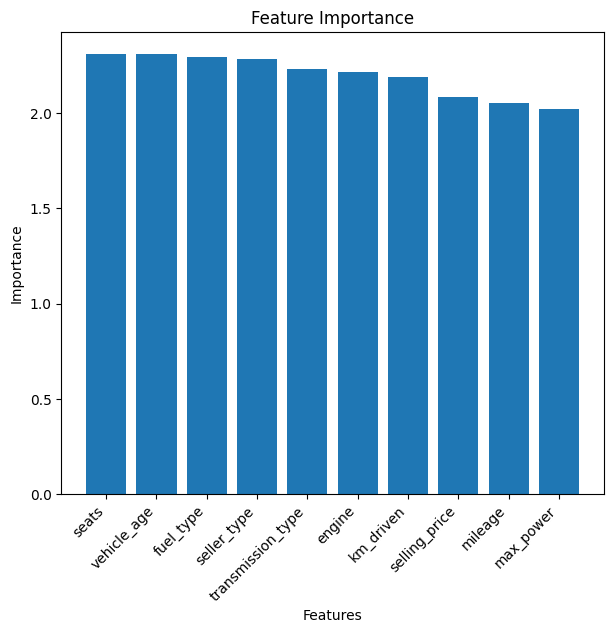

Silhouette Score: 0.45
Davies-Bouldin Index: 0.92
Calinski-Harabasz Index: 13009.57


In [87]:
# Apply K-Means clustering
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_frame_shuffled['cluster'] = kmeans.fit_predict(data_frame_shuffled)

data_frame_shuffled_original['cluster'] = data_frame_shuffled['cluster']


data_frame_shuffled_original.to_csv('result_kmeans_3clusters.csv')


fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(111, projection='3d')
x = np.array(data_frame_shuffled['vehicle_age'])
y = np.array(data_frame_shuffled['seats'])
z = np.array(data_frame_shuffled['fuel_type'])

ax.scatter(x,y,z, marker="s", c=data_frame_shuffled["cluster"], s=40, cmap="inferno", label=True)
ax.set_xlabel('vehicle_age ->')
ax.set_ylabel('seats ->')
ax.set_zlabel('fuel_type ->')

plt.show()


# Compute mean values of features within each cluster
cluster_means = data_frame_shuffled.groupby('cluster').mean()

# Calculate feature importance by comparing mean values across clusters
feature_importance = cluster_means.sub(cluster_means.mean()).abs().sum() / cluster_means.std()

# Sort features by importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(7, 6))
plt.bar(feature_importance_sorted.index, feature_importance_sorted)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'vehicle_age ->'),yaxis = dict(title  = 'seats ->'),zaxis = dict(title  = 'fuel_type ->'))
labels = kmeans.labels_
trace = go.Scatter3d(x=data_frame_shuffled['vehicle_age'], y=data_frame_shuffled['seats'], z=data_frame_shuffled['fuel_type'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


# Calculate clustering metrics
silhouette = silhouette_score(data_frame_shuffled, kmeans.labels_)
db_index = davies_bouldin_score(data_frame_shuffled, kmeans.labels_)
ch_index = calinski_harabasz_score(data_frame_shuffled, kmeans.labels_)

 
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

### Klasterizacija k-means algoritmom, 4 klastera

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



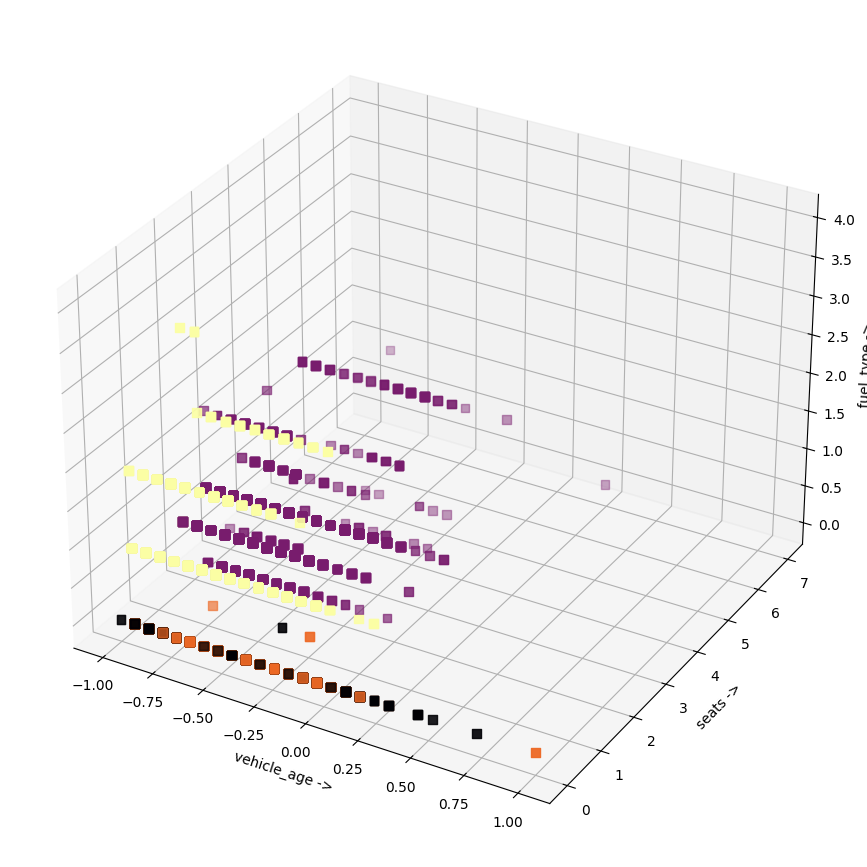

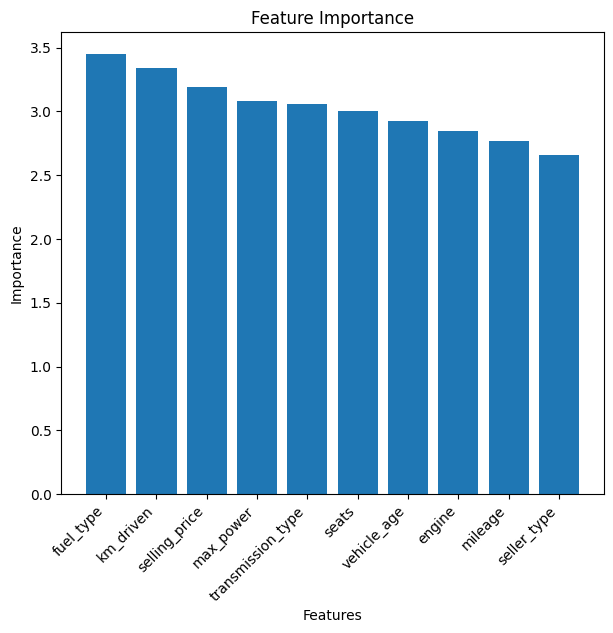

Silhouette Score: 0.53
Davies-Bouldin Index: 0.75
Calinski-Harabasz Index: 16598.30


In [88]:
# Apply K-Means clustering
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_frame_shuffled['cluster'] = kmeans.fit_predict(data_frame_shuffled)

data_frame_shuffled_original['cluster'] = data_frame_shuffled['cluster']


data_frame_shuffled_original.to_csv('result_kmeans_4clusters.csv')


fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(111, projection='3d')
x = np.array(data_frame_shuffled['vehicle_age'])
y = np.array(data_frame_shuffled['seats'])
z = np.array(data_frame_shuffled['fuel_type'])

ax.scatter(x,y,z, marker="s", c=data_frame_shuffled["cluster"], s=40, cmap="inferno", label=True)
ax.set_xlabel('vehicle_age ->')
ax.set_ylabel('seats ->')
ax.set_zlabel('fuel_type ->')

plt.show()


# Compute mean values of features within each cluster
cluster_means = data_frame_shuffled.groupby('cluster').mean()

# Calculate feature importance by comparing mean values across clusters
feature_importance = cluster_means.sub(cluster_means.mean()).abs().sum() / cluster_means.std()

# Sort features by importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(7, 6))
plt.bar(feature_importance_sorted.index, feature_importance_sorted)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'vehicle_age ->'),yaxis = dict(title  = 'seats ->'),zaxis = dict(title  = 'fuel_type ->'))
labels = kmeans.labels_
trace = go.Scatter3d(x=data_frame_shuffled['vehicle_age'], y=data_frame_shuffled['seats'], z=data_frame_shuffled['fuel_type'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


# Calculate clustering metrics
silhouette = silhouette_score(data_frame_shuffled, kmeans.labels_)
db_index = davies_bouldin_score(data_frame_shuffled, kmeans.labels_)
ch_index = calinski_harabasz_score(data_frame_shuffled, kmeans.labels_)

 
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

### Brisanje kolona "seller_type" i "engine"

In [89]:
data_frame_shuffled.drop("seller_type", axis=1, inplace=True) 
data_frame_shuffled.drop("engine", axis=1, inplace=True) 

### Klasterizacija k-means algoritmom, 3 klastera bez kolona "seller_type" i "engine"

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



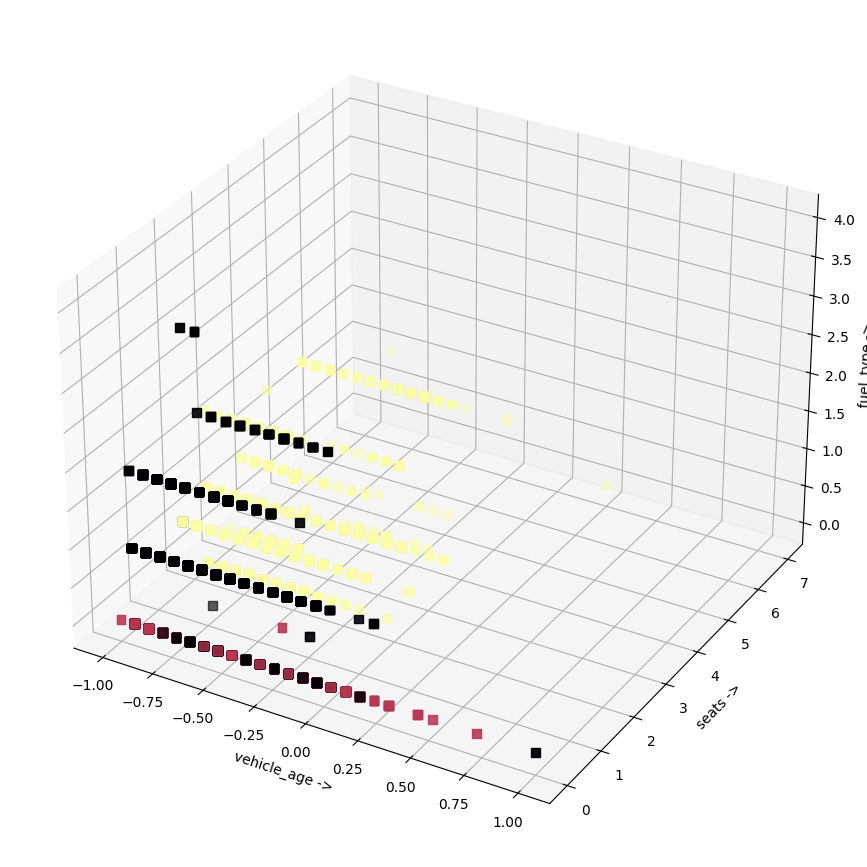

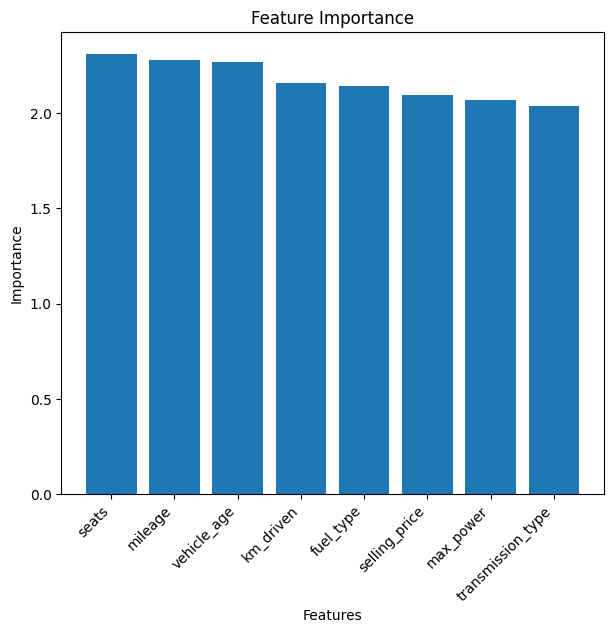

Silhouette Score: 0.36
Davies-Bouldin Index: 0.89
Calinski-Harabasz Index: 13188.20


In [90]:
# Apply K-Means clustering
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_frame_shuffled['cluster'] = kmeans.fit_predict(data_frame_shuffled)

data_frame_shuffled_original['cluster'] = data_frame_shuffled['cluster']


data_frame_shuffled_original.to_csv('result_kmeans_3clusters_no2c.csv')


fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(111, projection='3d')
x = np.array(data_frame_shuffled['vehicle_age'])
y = np.array(data_frame_shuffled['seats'])
z = np.array(data_frame_shuffled['fuel_type'])

ax.scatter(x,y,z, marker="s", c=data_frame_shuffled["cluster"], s=40, cmap="inferno", label=True)
ax.set_xlabel('vehicle_age ->')
ax.set_ylabel('seats ->')
ax.set_zlabel('fuel_type ->')

plt.show()


# Compute mean values of features within each cluster
cluster_means = data_frame_shuffled.groupby('cluster').mean()

# Calculate feature importance by comparing mean values across clusters
feature_importance = cluster_means.sub(cluster_means.mean()).abs().sum() / cluster_means.std()

# Sort features by importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(7, 6))
plt.bar(feature_importance_sorted.index, feature_importance_sorted)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'vehicle_age ->'),yaxis = dict(title  = 'seats ->'),zaxis = dict(title  = 'fuel_type ->'))
labels = kmeans.labels_
trace = go.Scatter3d(x=data_frame_shuffled['vehicle_age'], y=data_frame_shuffled['seats'], z=data_frame_shuffled['fuel_type'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


# Calculate clustering metrics
silhouette = silhouette_score(data_frame_shuffled, kmeans.labels_)
db_index = davies_bouldin_score(data_frame_shuffled, kmeans.labels_)
ch_index = calinski_harabasz_score(data_frame_shuffled, kmeans.labels_)

 
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

### Klasterizacija k-means algoritmom, 4 klastera bez kolona "seller_type" i "engine"

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



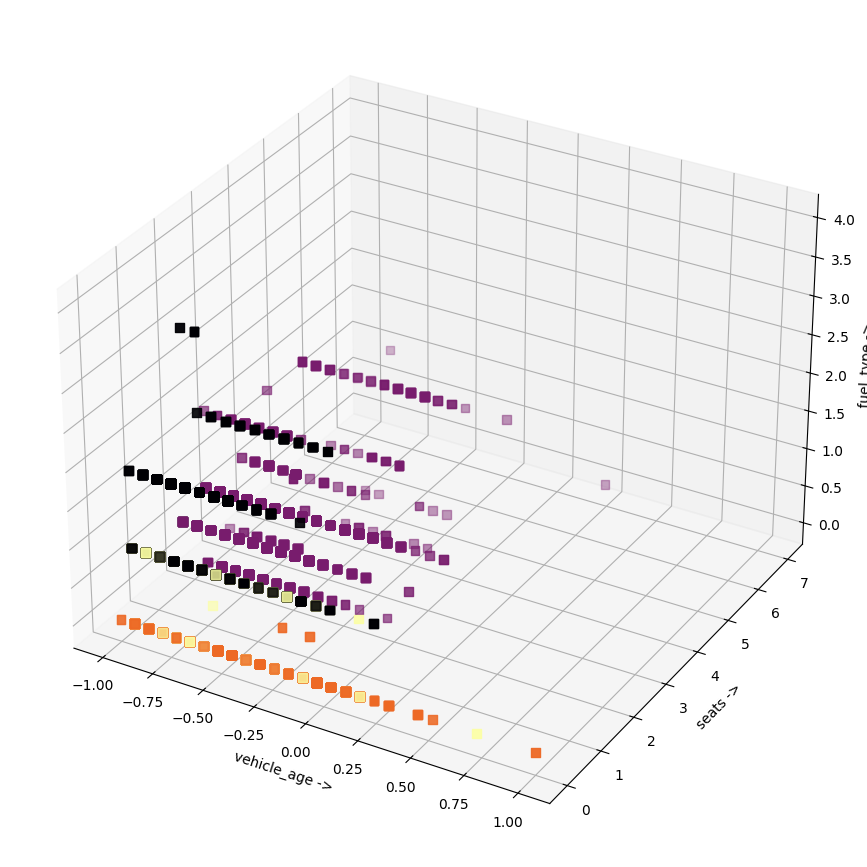

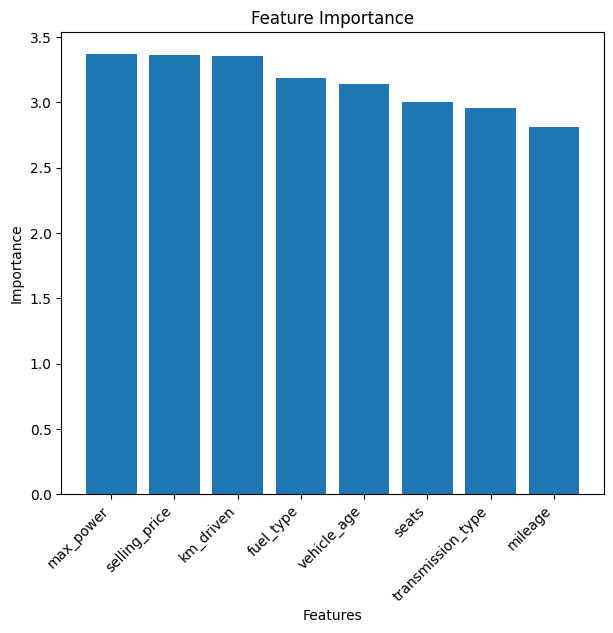

Silhouette Score: 0.66
Davies-Bouldin Index: 0.61
Calinski-Harabasz Index: 26764.67


In [91]:
# Apply K-Means clustering
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_frame_shuffled['cluster'] = kmeans.fit_predict(data_frame_shuffled)

data_frame_shuffled_original['cluster'] = data_frame_shuffled['cluster']


data_frame_shuffled_original.to_csv('result_kmeans_4clusters_no2c.csv')


fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(111, projection='3d')
x = np.array(data_frame_shuffled['vehicle_age'])
y = np.array(data_frame_shuffled['seats'])
z = np.array(data_frame_shuffled['fuel_type'])

ax.scatter(x,y,z, marker="s", c=data_frame_shuffled["cluster"], s=40, cmap="inferno", label=True)
ax.set_xlabel('vehicle_age ->')
ax.set_ylabel('seats ->')
ax.set_zlabel('fuel_type ->')

plt.show()


# Compute mean values of features within each cluster
cluster_means = data_frame_shuffled.groupby('cluster').mean()

# Calculate feature importance by comparing mean values across clusters
feature_importance = cluster_means.sub(cluster_means.mean()).abs().sum() / cluster_means.std()

# Sort features by importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(7, 6))
plt.bar(feature_importance_sorted.index, feature_importance_sorted)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'vehicle_age ->'),yaxis = dict(title  = 'seats ->'),zaxis = dict(title  = 'fuel_type ->'))
labels = kmeans.labels_
trace = go.Scatter3d(x=data_frame_shuffled['vehicle_age'], y=data_frame_shuffled['seats'], z=data_frame_shuffled['fuel_type'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


# Calculate clustering metrics
silhouette = silhouette_score(data_frame_shuffled, kmeans.labels_)
db_index = davies_bouldin_score(data_frame_shuffled, kmeans.labels_)
ch_index = calinski_harabasz_score(data_frame_shuffled, kmeans.labels_)

 
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")